## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## Import cleaned data

In [2]:
df=pd.read_csv('ZomatoCleanedData.csv')
df.describe()
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
len(df[df['Country']=='India'])#final dataset

6513

In [4]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two ($USD),Price range,Aggregate rating,Votes,Total Cuisines Variety
count,7.403000e+03,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000
mean,7.158676e+06,23.268675,65.725411,26.918958,12.202349,1.970147,3.440024,202.185060,2.198568
std,8.444634e+06,63.426253,43.394143,10.387038,15.477894,0.930611,0.552195,479.195199,1.134801
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.660000,1.000000,1.800000,4.000000,1.000000
25%,1.534450e+04,1.000000,77.088917,28.480550,5.250000,1.000000,3.000000,19.000000,1.000000
50%,3.120540e+05,1.000000,77.195446,28.571730,7.880000,2.000000,3.400000,60.000000,2.000000
75%,1.821955e+07,1.000000,77.281687,28.645531,13.130000,3.000000,3.800000,181.000000,3.000000
max,1.849606e+07,216.000000,174.832089,55.976980,352.610000,4.000000,4.900000,10934.000000,8.000000


## Recommendation System by Content Based

In [5]:
#Create dataframe content based by Cuisine
cb_Cuisines=df[df['Country']=='India'][['Restaurant Name','Cuisines','City','Locality Verbose','Country','Longitude','Latitude','Average Cost for two ($USD)','Aggregate rating','Votes']]
cb_Cuisines.reset_index(drop=True,inplace=True)
## Cleaning item cuisine name from ' ' and '-'
cb_Cuisines['Cuisines']=cb_Cuisines.Cuisines.str.replace(' ','')
cb_Cuisines['Cuisines']=cb_Cuisines.Cuisines.str.replace('-','')

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
cv_genres_result=cv.fit_transform(cb_Cuisines.Cuisines)
cv_df= pd.DataFrame(cv_genres_result.todense(),columns=cv.get_feature_names(),index=cb_Cuisines['Restaurant Name'])
cv_df.columns

Index(['afghani', 'african', 'american', 'andhra', 'arabian', 'armenian',
       'asian', 'assamese', 'awadhi', 'bakery', 'bbq', 'belgian', 'bengali',
       'beverages', 'bihari', 'biryani', 'british', 'burger', 'burmese',
       'cafe', 'cajun', 'charcoalgrill', 'chettinad', 'chinese', 'continental',
       'deli', 'desserts', 'drinksonly', 'european', 'fastfood', 'fingerfood',
       'french', 'german', 'goan', 'greek', 'gujarati', 'healthyfood',
       'hyderabadi', 'icecream', 'indian', 'indonesian', 'iranian', 'italian',
       'japanese', 'juices', 'kashmiri', 'kerala', 'korean', 'lebanese',
       'lucknowi', 'maharashtrian', 'malaysian', 'malwani', 'mangalorean',
       'mediterranean', 'mexican', 'middleeastern', 'mithai', 'modernindian',
       'moroccan', 'mughlai', 'naga', 'nepalese', 'northeastern',
       'northindian', 'oriya', 'pakistani', 'parsi', 'persian', 'pizza',
       'portuguese', 'rajasthani', 'rawmeats', 'salad', 'sandwich', 'seafood',
       'southamerican',

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sin_cuisine=cosine_similarity(cv_genres_result)

In [8]:
pd.DataFrame(cos_sin_cuisine,index=cb_Cuisines['Restaurant Name'],columns=cb_Cuisines['Restaurant Name'])

Restaurant Name                        Jahanpanah  Rangrezz Restaurant  \
Restaurant Name                                                          
Jahanpanah                               1.000000             1.000000   
Rangrezz Restaurant                      1.000000             1.000000   
Time2Eat - Mama Chicken                  0.707107             0.707107   
Chokho Jeeman Marwari Jain Bhojanalya    0.000000             0.000000   
Pinch Of Spice                           0.816497             0.816497   
...                                           ...                  ...   
D Cabana                                 0.316228             0.316228   
Kaloreez                                 0.408248             0.408248   
Plot 17                                  0.000000             0.000000   
Vista - The Park                         0.353553             0.353553   
Flying Spaghetti Monster                 0.000000             0.000000   

Restaurant Name                        Time2Eat - Mama Chicken  \
Restaurant Name                                                  
Jahanpanah                                            0.707107   
Rangrezz Restaurant                                   0.707107   
Time2Eat - Mama Chicken                               1.000000   
Chokho Jeeman Marwari Jain Bhojanalya                 0.000000   
Pinch Of Spice                                        0.577350   
...                                                        ...   
D Cabana                                              0.447214   
Kaloreez                                              0.577350   
Plot 17                                               0.000000   
Vista - The Park                                      0.500000   
Flying Spaghetti Monster                              0.000000   

Restaurant Name                        Chokho Jeeman Marwari Jain Bhojanalya  \
Restaurant Name                                                                
Jahanpanah                                                               0.0   
Rangrezz Restaurant                                                      0.0   
Time2Eat - Mama Chicken                                                  0.0   
Chokho Jeeman Marwari Jain Bhojanalya                                    1.0   
Pinch Of Spice                                                           0.0   
...                                                                      ...   
D Cabana                                                                 0.0   
Kaloreez                                                                 0.0   
Plot 17                                                                  0.0   
Vista - The Park                                                         0.0   
Flying Spaghetti Monster                                                 0.0   

Restaurant Name                        Pinch Of Spice  MoMo Cafe  \
Restaurant Name                                                    
Jahanpanah                                   0.816497   0.500000   
Rangrezz Restaurant                          0.816497   0.500000   
Time2Eat - Mama Chicken                      0.577350   0.707107   
Chokho Jeeman Marwari Jain Bhojanalya        0.000000   0.000000   
Pinch Of Spice                               1.000000   0.408248   
...                                               ...        ...   
D Cabana                                     0.516398   0.316228   
Kaloreez                                     0.666667   0.408248   
Plot 17                                      0.000000   0.000000   
Vista - The Park                             0.288675   0.353553   
Flying Spaghetti Monster                     0.000000   0.000000   

Restaurant Name                        Peshawri - ITC Mughal  \
Restaurant Name                                                
Jahanpanah                                          1.000000   
Rangrezz Restaurant                                 1.000000

In [9]:
def get_recomendation_restaurant(title):
    index_to_search=cb_Cuisines[cb_Cuisines['Restaurant Name']==title].index[0]
    Resto_similar=pd.Series(cos_sin_cuisine[index_to_search])
    index_similar=Resto_similar.sort_values(ascending=False).head(11).index
    recom=cb_Cuisines.loc[index_similar]
    recom.reset_index(drop=True,inplace=True)
    
    return recom[1:11]

In [10]:
get_recomendation_restaurant('Jahanpanah')

,Restaurant Name,Cuisines,City,Locality Verbose,Country,Longitude,Latitude,Average Cost for two ($USD),Aggregate rating,Votes
1,Desi Vibes,"NorthIndian,Mughlai",New Delhi,"Defence Colony, New Delhi",India,77.230142,28.573814,19.70,4.0,183.0
2,Khansama,"NorthIndian,Mughlai",New Delhi,"Vasundhara Enclave, New Delhi",India,77.304039,28.589109,4.60,3.3,30.0
3,Bablu Kabab Shop,"NorthIndian,Mughlai",New Delhi,"Ashok Vihar Phase 3, New Delhi",India,77.178127,28.691946,6.57,3.1,10.0
4,Puran Chand Ambala Wale Di Hatti,"NorthIndian,Mughlai",New Delhi,"Ashok Vihar Phase 3, New Delhi",India,77.178038,28.692475,7.88,3.3,34.0
5,Bablu Chic Inn,"Mughlai,NorthIndian",New Delhi,"Ashok Vihar Phase 3, New Delhi",India,77.178049,28.692485,9.85,3.6,34.0
6,Udta Punjab,"NorthIndian,Mughlai",New Delhi,"Ashok Vihar Phase 3, New Delhi",India,77.178038,28.692475,7.88,3.5,31.0
7,New Janta Restaurant,"NorthIndian,Mughlai",New Delhi,"Vasant Vihar, New Delhi",India,77.158399,28.567712,7.88,3.1,31.0
8,Soul Curry - Bellagio,"NorthIndian,Mughlai",New Delhi,"Bellagio, Ashok Vihar Phase 2, New Delhi",India,77.179924,28.696328,14.45,3.6,158.0
9,Tipu Sultan,"NorthIndian,Mughlai",New Delhi,"Vasant Square Mall, Vasant Kunj, New Delhi",India,77.156656,28.524987,11.16,3.7,364.0
10,Snack Bar,"NorthIndian,Mughlai",New Delhi,"Bhikaji Cama Place, New Delhi",India,77.187206,28.568207,3.28,3.0,11.0


### Now we have the recommendation function. However, these recommendations are only based on Cuisine. to make it more relevant as a recommendation to the user, it will use cos sin similarity from the location (locality verbose and country)

In [11]:
#merge localityverbose and country
localityvcountry=[]
for i in range(len(cb_Cuisines['Locality Verbose'])):
    localityvcountry.append(str(cb_Cuisines['Locality Verbose'][i])+', '+str(cb_Cuisines['Country'][i]))
cb_Cuisines['Location']=localityvcountry
##cleaning from punctuation
char=['-',' ','_','&']
for i in char:
    cb_Cuisines['Location']=cb_Cuisines.Location.str.replace(str(i),'')
char=[':','/']
for i in char:
    cb_Cuisines['Location']=cb_Cuisines.Location.str.replace(str(i),',')

In [12]:
for x in range(len(cb_Cuisines)):    
    split=cb_Cuisines.Location.loc[x].split(',')
    item1=[]
    for item in split:
        if item[0]==' ':
            item1.append(item[1::])
        else:
            item1.append(item)
    z=[]
    for i in item1:
        check=False
        for b in z:
            if b==i:
                check = True
        if (check==False):
            z.append(i)
    joinitem=','.join(map(str,z))
    cb_Cuisines.Location.loc[x]=joinitem

In [13]:
cb_Cuisines

,Restaurant Name,Cuisines,City,Locality Verbose,Country,Longitude,Latitude,Average Cost for two ($USD),Aggregate rating,Votes,Location
0,Jahanpanah,"NorthIndian,Mughlai",Agra,"Agra Cantt, Agra",India,78.011544,27.161661,11.16,3.9,140.0,"AgraCantt,Agra,India"
1,Rangrezz Restaurant,"NorthIndian,Mughlai",Agra,"Agra Cantt, Agra",India,78.032615,27.166690,9.19,3.5,71.0,"AgraCantt,Agra,India"
2,Time2Eat - Mama Chicken,NorthIndian,Agra,"Agra Cantt, Agra",India,78.011608,27.160832,6.57,3.6,94.0,"AgraCantt,Agra,India"
3,Chokho Jeeman Marwari Jain Bhojanalya,Rajasthani,Agra,"Civil Lines, Agra",India,77.998092,27.195928,5.25,4.0,87.0,"CivilLines,Agra,India"
4,Pinch Of Spice,"NorthIndian,Chinese,Mughlai",Agra,"Civil Lines, Agra",India,78.007553,27.201725,13.13,4.2,177.0,"CivilLines,Agra,India"
...,...,...,...,...,...,...,...,...,...,...,...
6508,D Cabana,"Continental,Seafood,Chinese,NorthIndian,Biryani",Vizag,"Sagar Nagar, Vizag",India,83.361377,17.764287,7.88,3.6,193.0,"SagarNagar,Vizag,India"
6509,Kaloreez,"Cafe,NorthIndian,Chinese",Vizag,"Siripuram, Vizag",India,83.323489,17.729957,5.25,3.7,85.0,"Siripuram,Vizag,India"
6510,Plot 17,"Burger,Pizza,Biryani",Vizag,"Siripuram, Vizag",India,83.315281,17.719539,7.88,4.3,172.0,"Siripuram,Vizag,India"
6511,Vista - The Park,"American,NorthIndian,Thai,Continental",Vizag,"The Park, Lawsons Bay, Vizag",India,83.336840,17.721182,19.70,3.8,74.0,"ThePark,LawsonsBay,Vizag,India"


In [14]:
cv_Location=cv.fit_transform(cb_Cuisines['Location'])
cv_dfloc= pd.DataFrame(cv_Location.todense(),columns=cv.get_feature_names(),index=cb_Cuisines['Restaurant Name'])
cv_dfloc

,12thsquarebuilding,acropolismall,adajangam,adchini,adityamegamall,adyar,aerocity,aggarnagar,aggarwalcitymall,aggarwalcityplaza,agra,agracantt,ahmedabad,ahotel,akashwani,alaknanda,alkapuri,allahabad,ambavadi,ambiencemall,aminabad,amritsar,anandlok,anandpuri,anandvihar,anandwaligoan,andazdelhi,andheriwest,anilplaza,anjuna,anjunabeach,annanagareast,ansalplazamall,arambol,ardeecity,areracolony,arssmall,aryanagar,asafaliroad,ashoknagar,ashokviharphase1,ashokviharphase2,ashokviharphase3,ashramroad,assighat,athwa,attavar,aurangabad,aurangzebroad,auroville,azadnagar,badarpurborder,baga,baisgodam,bajajnagar,balewadi,balewadihighstreet,ballygunge,balmatta,bandrawest,baner,bangalore,banipark,banjarahills,barakhambaroad,bariatu,basantlokmarket,basantnagar,bellagio,bestwesternskycityhotel,bestwesterntaurushotel,betalbatim,bhavathi,bhawarkuan,bhelupur,bhikajicamaplace,bhopal,bhubaneshwar,blupetalhotel,bmcbhawanimall,bodakdev,bonvivant,borivalieast,borivaliwest,brahmaputrashoppingcomplex,brsnagar,calangute,calangutebeach,camacstreetarea,candolim,cavelossim,centralarcade,centralplazamall,centrestagemall,cgroad,chamrajpura,chanakyapuri,chandernagar,chandigarh,chandigarhindustrialarea,chandmari,chandnichowk,chandrasekharpur,charmwoodvillage,chawribazar,chennai,chhatarpur,chicalthana,chittaranjanpark,chittoorroad,chokhidhanivillageresort,christianbasti,chukkuwala,cidco,citycenter,citycentremall,citylight,citysquaremall,civillines,cmrcentralmall,coimbatore,collegeroad,communitycentre,connaughtplace,countryinnsuites,countryinnsuitesbycarlson,courtyardbymarriott,courtyardbymarriottagra,crescentsquaremall,crosspointmall,crossrivermall,crowneplaza,crowneplazahotel,crowninteriorzmall,crownplazamall,cscheme,cybergreens,cyberhub,daryaganj,dashaswmedhroad,dbcity,ddamarket,deccangymkhana,defencecolony,dehradun,delhiuniversitygtbnagar,devrajniwas,dhantoli,dharampeth,dillihaat,dilshadgarden,dispur,districtcentre,diwalipura,dlfcitycentremall,dlfcybercity,dlfemporiomall,dlfgalleria,dlfmallofindia,dlfmegamall,dlfphase1,dlfphase2,dlfphase3,dlfphase4,dlfphase5,dlfplacemall,dlfpromenademall,dlfsouthpointmall,dlfsouthsquare,dlfstarmall,dmall,doora,doranda,doubletreebyhilton,dr,dtcitycentremall,dtmegamall,durgapuri,dwarakanagar,dwarka,eastofkailash,eastpatelnagar,edappally,elantemall,eldecostation1mall,elgin,ellisbridge,epicuriafoodmall,eroshotel,essexfarms,expressavenuemall,faridabad,ferozeshahroad,fort,fortkochi,fortuneinngrazia,fortuneselectexcalibur,fortuneselectglobal,fraserroadarea,friendscolony,gachibowli,gajapatinagar,gandhinagar,gandhipuram,gangashoppingcomplex,gardenoffivesenses,gardensgalleria,geetacolony,ghatlodia,ghaziabad,gingerhotel,gk,globalfoyermall,goa,godaulia,gokulam,golambar,goldensquare,goldfinchhotel,golfcourseroad,golpark,gomtinagar,gopalapuram,gourmethub,grandhotel,greaterkailash,greaternoida,greenpark,gtbnagar,gujranwalatown,gulmoharcolony,gurdevnagar,gurgaon,gurukul,guwahati,hampankatta,harmu,harshamall,hathibarkalasalwala,hathigate,hauzkhas,hauzkhasvillage,hazratganj,heritagetown,higlig,hillroad,hindpiri,hitechcity,holidayinn,holidayinnexpresssuites,holidayinnjaipurcitycentre,hongkongbazaarmall,hotelbroadway,hotelcapitolhill,hotelcitypark,hotelclarkinn,hotelclarksamer,hoteldepondicherry,hotelexpresstowers,hotelgolfview,hotelgreenolive,hotelgreenpark,hotelgrenville,hotelhaute,hotelmaurya,hotelnovotel,hotelregentgrand,hotelroyalcliff,hoteltheroyalplaza,hudacitycentremetrostation,hyattplacegurgaon,hyattregency,hyderabad,ibishotel,ibisnewdelhi,iitkanpur,ildtradecentremall,ina,inacolony,india,indiagate,indiranagar,indirapuram,indore,infinitihotel,internationalbusinesscenter,ipextension,itcmaurya,itcmughal,ito,ittigegudu,jagadambajunction,jailroad,jaipur,jaipuriaplaza,jakhan,jamamasjid,janakpuri,jangpura,janpath,jasola,jayadevvihar,jayalakhsmipuram,jaypeegreens,jaypeegreensgolfsparesort,jaypeesiddharth,jaypeevasantcontinental,jmdkohinoormall,jmdmegapolismall,jmdregentarcademall,jmroad,jnu,jorbagh,jpnagar,jubileehills,juhu,jukasoitsuites,jwmar

In [15]:
cos_sin_loc=cosine_similarity(cv_Location)
pd.DataFrame(cos_sin_loc,index=cb_Cuisines['Restaurant Name'],columns=cb_Cuisines['Restaurant Name'])

Restaurant Name                        Jahanpanah  Rangrezz Restaurant  \
Restaurant Name                                                          
Jahanpanah                               1.000000             1.000000   
Rangrezz Restaurant                      1.000000             1.000000   
Time2Eat - Mama Chicken                  1.000000             1.000000   
Chokho Jeeman Marwari Jain Bhojanalya    0.666667             0.666667   
Pinch Of Spice                           0.666667             0.666667   
...                                           ...                  ...   
D Cabana                                 0.333333             0.333333   
Kaloreez                                 0.333333             0.333333   
Plot 17                                  0.333333             0.333333   
Vista - The Park                         0.288675             0.288675   
Flying Spaghetti Monster                 0.333333             0.333333   

Restaurant Name                        Time2Eat - Mama Chicken  \
Restaurant Name                                                  
Jahanpanah                                            1.000000   
Rangrezz Restaurant                                   1.000000   
Time2Eat - Mama Chicken                               1.000000   
Chokho Jeeman Marwari Jain Bhojanalya                 0.666667   
Pinch Of Spice                                        0.666667   
...                                                        ...   
D Cabana                                              0.333333   
Kaloreez                                              0.333333   
Plot 17                                               0.333333   
Vista - The Park                                      0.288675   
Flying Spaghetti Monster                              0.333333   

Restaurant Name                        Chokho Jeeman Marwari Jain Bhojanalya  \
Restaurant Name                                                                
Jahanpanah                                                          0.666667   
Rangrezz Restaurant                                                 0.666667   
Time2Eat - Mama Chicken                                             0.666667   
Chokho Jeeman Marwari Jain Bhojanalya                               1.000000   
Pinch Of Spice                                                      1.000000   
...                                                                      ...   
D Cabana                                                            0.333333   
Kaloreez                                                            0.333333   
Plot 17                                                             0.333333   
Vista - The Park                                                    0.288675   
Flying Spaghetti Monster                                            0.333333   

Restaurant Name                        Pinch Of Spice  MoMo Cafe  \
Restaurant Name                                                    
Jahanpanah                                   0.666667   0.577350   
Rangrezz Restaurant                          0.666667   0.577350   
Time2Eat - Mama Chicken                      0.666667   0.577350   
Chokho Jeeman Marwari Jain Bhojanalya        1.000000   0.577350   
Pinch Of Spice                               1.000000   0.577350   
...                                               ...        ...   
D Cabana                                     0.333333   0.288675   
Kaloreez                                     0.333333   0.288675   
Plot 17                                      0.333333   0.288675   
Vista - The Park                             0.288675   0.250000   
Flying Spaghetti Monster                     0.333333   0.288675   

Restaurant Name                        Peshawri - ITC Mughal  \
Restaurant Name                                                
Jahanpanah                                          0.577350   
Rangrezz Restaurant                                 0.577350

In [16]:
#combining cos sin similarity location and cuisine
cos_sin_loc_cuisine=(cos_sin_loc*0.70)+(cos_sin_cuisine*0.30)

In [17]:
from math import sin, cos, sqrt, atan2, radians
def get_recomendation_restaurantbyloccuisine(title="Jahanpanah",Location='AgraCantt,Agra,India'):
    index_to_search=cb_Cuisines[(cb_Cuisines['Restaurant Name']==title)&(cb_Cuisines['Location']==Location)].index[0]
    Resto_similar=pd.Series(cos_sin_loc_cuisine[index_to_search])
    index_similar=Resto_similar.sort_values(ascending=False).head(6).index
    recommendation=cb_Cuisines.loc[index_similar]
    recommendation.reset_index(drop=True,inplace=True)
    dist=[]

    for i in range(len(recommendation)):
        # approximate radius of earth in km
        R = 6373.0
        
        lat1 = radians(recommendation['Latitude'][0])
        lon1 = radians(recommendation['Longitude'][0])
        lat2 = radians(recommendation['Latitude'][i])
        lon2 = radians(recommendation['Longitude'][i])
        
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        
        distance = R * c
        
        dist.append(round(distance,2))
    recommendation['Distance Approximate(Km)']=dist
    recommendation=recommendation[['Restaurant Name','Cuisines','City','Country','Average Cost for two ($USD)','Aggregate rating','Votes','Distance Approximate(Km)']].loc[1:6]
    return recommendation

get_recomendation_restaurantbyloccuisine()

In [18]:
cb_Cuisines

,Restaurant Name,Cuisines,City,Locality Verbose,Country,Longitude,Latitude,Average Cost for two ($USD),Aggregate rating,Votes,Location
0,Jahanpanah,"NorthIndian,Mughlai",Agra,"Agra Cantt, Agra",India,78.011544,27.161661,11.16,3.9,140.0,"AgraCantt,Agra,India"
1,Rangrezz Restaurant,"NorthIndian,Mughlai",Agra,"Agra Cantt, Agra",India,78.032615,27.166690,9.19,3.5,71.0,"AgraCantt,Agra,India"
2,Time2Eat - Mama Chicken,NorthIndian,Agra,"Agra Cantt, Agra",India,78.011608,27.160832,6.57,3.6,94.0,"AgraCantt,Agra,India"
3,Chokho Jeeman Marwari Jain Bhojanalya,Rajasthani,Agra,"Civil Lines, Agra",India,77.998092,27.195928,5.25,4.0,87.0,"CivilLines,Agra,India"
4,Pinch Of Spice,"NorthIndian,Chinese,Mughlai",Agra,"Civil Lines, Agra",India,78.007553,27.201725,13.13,4.2,177.0,"CivilLines,Agra,India"
...,...,...,...,...,...,...,...,...,...,...,...
6508,D Cabana,"Continental,Seafood,Chinese,NorthIndian,Biryani",Vizag,"Sagar Nagar, Vizag",India,83.361377,17.764287,7.88,3.6,193.0,"SagarNagar,Vizag,India"
6509,Kaloreez,"Cafe,NorthIndian,Chinese",Vizag,"Siripuram, Vizag",India,83.323489,17.729957,5.25,3.7,85.0,"Siripuram,Vizag,India"
6510,Plot 17,"Burger,Pizza,Biryani",Vizag,"Siripuram, Vizag",India,83.315281,17.719539,7.88,4.3,172.0,"Siripuram,Vizag,India"
6511,Vista - The Park,"American,NorthIndian,Thai,Continental",Vizag,"The Park, Lawsons Bay, Vizag",India,83.336840,17.721182,19.70,3.8,74.0,"ThePark,LawsonsBay,Vizag,India"


# Linear Regressions

## From the dataset above we can also predict average cost as a prediction for users when they come to a restaurant with these criteria

In [19]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two ($USD),Price range,Aggregate rating,Votes,Total Cuisines Variety
count,7.403000e+03,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000
mean,7.158676e+06,23.268675,65.725411,26.918958,12.202349,1.970147,3.440024,202.185060,2.198568
std,8.444634e+06,63.426253,43.394143,10.387038,15.477894,0.930611,0.552195,479.195199,1.134801
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.660000,1.000000,1.800000,4.000000,1.000000
25%,1.534450e+04,1.000000,77.088917,28.480550,5.250000,1.000000,3.000000,19.000000,1.000000
50%,3.120540e+05,1.000000,77.195446,28.571730,7.880000,2.000000,3.400000,60.000000,2.000000
75%,1.821955e+07,1.000000,77.281687,28.645531,13.130000,3.000000,3.800000,181.000000,3.000000
max,1.849606e+07,216.000000,174.832089,55.976980,352.610000,4.000000,4.900000,10934.000000,8.000000


In [20]:
listFeat = []
for col in df.columns:
    listFeat.append([col, df[col].count(), df[col].nunique()
                   , df[col][0],df[col].value_counts().values[0]])

dfDesrciption = pd.DataFrame(columns=[' ', 'count', 'unique', 'top','freq'],
                            data=listFeat)
dfDesrciption

,,count,unique,top,freq
0,Restaurant ID,7403,7403,6317637,1
1,Restaurant Name,7403,5711,Le Petit Souffle,74
2,Country Code,7403,15,162,6513
3,City,7403,141,Makati City,4048
4,Address,7403,6968,"Third Floor, Century City Mall, Kalayaan Avenu...",11
5,Locality,7403,1175,"Century City Mall, Poblacion, Makati City",119
6,Locality Verbose,7403,1227,"Century City Mall, Poblacion, Makati City, Mak...",119
7,Longitude,7403,6515,121.028,73
8,Latitude,7403,6937,14.5654,73
9,Cuisines,7403,1715,"French, Japanese, Desserts",492


In [21]:
df.isna().sum()

Restaurant ID                  0
Restaurant Name                0
Country Code                   0
City                           0
Address                        0
Locality                       0
Locality Verbose               0
Longitude                      0
Latitude                       0
Cuisines                       0
Average Cost for two ($USD)    0
Currency                       0
Has Table booking              0
Has Online delivery            0
Is delivering now              0
Switch to order menu           0
Price range                    0
Aggregate rating               0
Rating color                   0
Rating text                    0
Votes                          0
Country                        0
Total Cuisines Variety         0
dtype: int64

In [22]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two ($USD),Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Total Cuisines Variety
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",21.70,Philippine Peso(PHP),Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0,Phillipines,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,23.67,Philippine Peso(PHP),Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0,Phillipines,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",78.90,Philippine Peso(PHP),Yes,No,No,No,4,4.4,Green,Very Good,270.0,Phillipines,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",29.59,Philippine Peso(PHP),No,No,No,No,4,4.9,Dark Green,Excellent,365.0,Phillipines,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",29.59,Philippine Peso(PHP),Yes,No,No,No,4,4.8,Dark Green,Excellent,229.0,Phillipines,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,11.45,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788.0,Turkey,1
7399,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",15.03,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034.0,Turkey,3
7400,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",24.33,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661.0,Turkey,2
7401,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,17.17,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901.0,Turkey,1


In [23]:
dfln=df[['Has Table booking','Has Online delivery','Votes','Price range','Average Cost for two ($USD)','Aggregate rating']]

In [24]:
n=df.copy()
n['Cuisines']=n['Cuisines'].str.replace(' ','')
joincuisine=','.join(map(str,n['Cuisines'].values))
def removeDuplicate(text):
    textsplit=text.split(",")
    z=[]
    for i in textsplit:
        check=False
        for b in z:
            if b==i:
                check = True
        if (check==False):
            z.append(i)
    return(z)
listcuisine=removeDuplicate(joincuisine)
for cuisine in listcuisine:
    dfln[cuisine] = n['Cuisines'].str.contains(str(cuisine))
    dfln[cuisine].replace({True:1,False:0},inplace=True)
dfln

,Has Table booking,Has Online delivery,Votes,Price range,Average Cost for two ($USD),Aggregate rating,French,Japanese,Desserts,Seafood,Asian,Filipino,Indian,Sushi,Korean,Chinese,European,Mexican,American,IceCream,Cafe,Italian,Pizza,Bakery,Mediterranean,FastFood,Brazilian,Arabian,BarFood,Grill,International,Peruvian,LatinAmerican,Burger,Juices,HealthyFood,Beverages,Lebanese,Sandwich,Steak,BBQ,GourmetFastFood,NorthEastern,CoffeeandTea,Vegetarian,Tapas,Breakfast,Diner,Southern,Southwestern,Spanish,Argentine,Caribbean,German,Vietnamese,Thai,Teriyaki,Cajun,Tex-Mex,MiddleEastern,Greek,BubbleTea,Cuban,Hawaiian,Salad,Irish,NewAmerican,Tea,SoulFood,Turkish,PubFood,British,Deli,ModernAustralian,Australian,Fusion,Canadian,Continental,Singaporean,Malay,Cantonese,DimSum,Western,FingerFood,Indonesian,NorthIndian,Mughlai,Biryani,SouthIndian,Pakistani,Afghani,Hyderabadi,Rajasthani,StreetFood,Goan,African,Portuguese,Gujarati,Armenian,Mithai,Maharashtrian,ModernIndian,CharcoalGrill,Malaysian,Burmese,Chettinad,Parsi,Tibetan,RawMeats,Kerala,Belgian,Kashmiri,SouthAmerican,Persian,Bengali,Iranian,Lucknowi,Awadhi,Nepalese,Oriya,Bihari,Assamese,Andhra,Mangalorean,Malwani,Moroccan,Naga,DrinksOnly,SriLankan,Peranakan,Sunda,Ramen,Kiwi,AsianFusion,Taiwanese,FishandChips,Contemporary,Scottish,Curry,Patisserie,SouthAfrican,Durban,Kebab,TurkishPizza,Izgara,WorldCuisine,Dí_ner,RestaurantCafe,Bí_rek
0,Yes,No,314.0,3,21.70,4.8,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Yes,No,591.0,3,23.67,4.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Yes,No,270.0,4,78.90,4.4,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,No,No,365.0,4,29.59,4.9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Yes,No,229.0,4,29.59,4.8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,No,No,788.0,3,11.45,4.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7399,No,No,1034.0,3,15.03,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [25]:
dfln=pd.get_dummies(dfln)
dfln.reset_index(drop=True,inplace=True)
#check correlation
corr = dfln.corr()[['Average Cost for two ($USD)']].sort_values('Average Cost for two ($USD)', ascending=False)
corr=corr[corr['Average Cost for two ($USD)']>0.2]
corr.index

Index(['Average Cost for two ($USD)', 'Price range', 'Aggregate rating',
       'French', 'Has Table booking_Yes'],
      dtype='object')

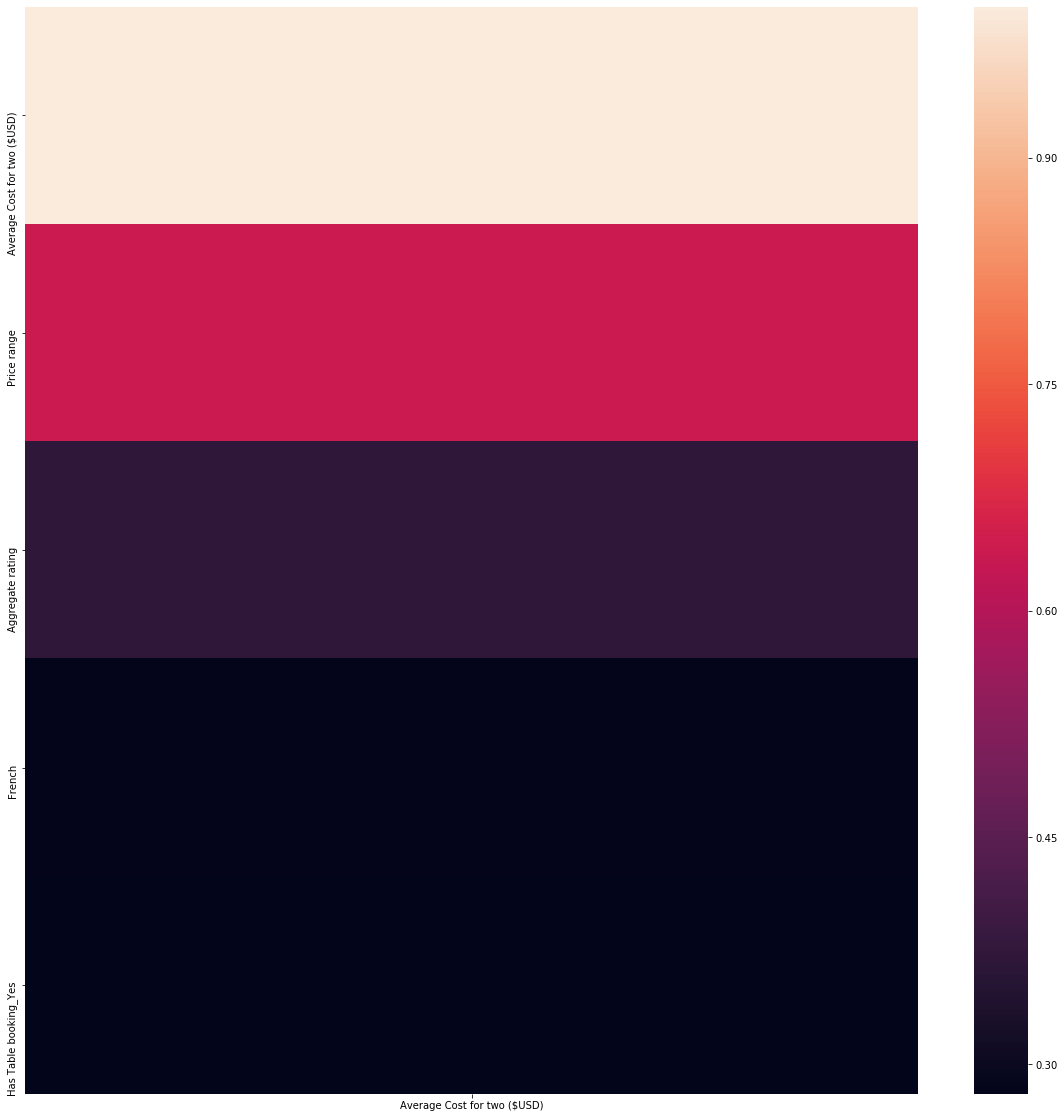

In [26]:
#check correlation with heatmap visualization
plt.figure(figsize=(20,20))
sns.heatmap(corr)
plt.show()

In [27]:
dfln1=dfln[['Average Cost for two ($USD)', 'Price range', 'Aggregate rating',
       'French', 'Has Table booking_Yes'   
       ]]
dfln1scale=dfln1.drop('Average Cost for two ($USD)',axis=1)
dfln1scale

,Price range,Aggregate rating,French,Has Table booking_Yes
0,3,4.8,1,1
1,3,4.5,0,1
2,4,4.4,0,1
3,4,4.9,0,0
4,4,4.8,0,1
...,...,...,...,...
7398,3,4.1,0,0
7399,3,4.2,0,0
7400,4,3.7,0,0
7401,4,4.0,0,0


In [28]:
from sklearn.preprocessing import MinMaxScaler
#standard scaling with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dfln1scale)
dfln1scale = pd.DataFrame(scaler.transform(dfln1scale),columns=dfln1scale.columns)
dfln1scale['Average Cost for two ($USD)']=dfln1['Average Cost for two ($USD)']
dfln1scale

,Price range,Aggregate rating,French,Has Table booking_Yes,Average Cost for two ($USD)
0,0.666667,0.967742,1.0,1.0,21.70
1,0.666667,0.870968,0.0,1.0,23.67
2,1.000000,0.838710,0.0,1.0,78.90
3,1.000000,1.000000,0.0,0.0,29.59
4,1.000000,0.967742,0.0,1.0,29.59
...,...,...,...,...,...
7398,0.666667,0.741935,0.0,0.0,11.45
7399,0.666667,0.774194,0.0,0.0,15.03
7400,1.000000,0.612903,0.0,0.0,24.33
7401,1.000000,0.709677,0.0,0.0,17.17


In [29]:
#set target and features
y = dfln1scale['Average Cost for two ($USD)']
X = dfln1scale.drop('Average Cost for two ($USD)', axis=1)

In [30]:
#Train test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
Price range,28.380848
Aggregate rating,10.750275
French,48.452688
Has Table booking_Yes,-0.301588


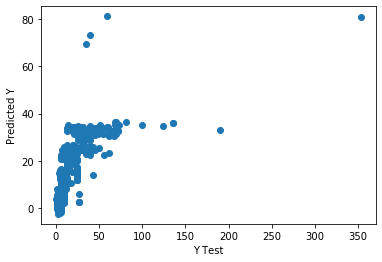

In [33]:
predictions = lm.predict(X_test) #predict test
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


In [34]:
score = r2_score(y_test,predictions)
score

0.47035169528558596

>R2 score of machine prediction is below 50%. I assume this happens because almost 90% data located in India.Data of the rest country got detected as outliers.

## Because almost 90% of the data is located in india then retrieve data based on the state of India

In [35]:
dfindia = df[(df['Country']=='India')]

In [36]:
dfindia.reset_index(drop=True,inplace=True)
#dataframe for linear regressions
dfln=dfindia[['Has Table booking','Has Online delivery','Votes','Price range','Average Cost for two ($USD)','Aggregate rating']]
dfln.reset_index(drop=True,inplace=True)

In [37]:
n=dfindia.copy()
n['Cuisines']=n['Cuisines'].str.replace(' ','')
joincuisine=','.join(map(str,n['Cuisines'].values))
def removeDuplicate(text):
    textsplit=text.split(",")
    z=[]
    for i in textsplit:
        check=False
        for b in z:
            if b==i:
                check = True
        if (check==False):
            z.append(i)
    return(z)
listcuisine=removeDuplicate(joincuisine)
for cuisine in listcuisine:
    dfln[cuisine] = n['Cuisines'].str.contains(str(cuisine))
    dfln[cuisine].replace({True:1,False:0},inplace=True)
dfln

,Has Table booking,Has Online delivery,Votes,Price range,Average Cost for two ($USD),Aggregate rating,NorthIndian,Mughlai,Rajasthani,Chinese,European,Gujarati,Continental,SouthIndian,Desserts,Cafe,Italian,Mexican,Pizza,FastFood,Mediterranean,Thai,IceCream,Beverages,Asian,StreetFood,Sandwich,Burger,HealthyFood,American,Armenian,Salad,Bakery,Mithai,Biryani,Juices,Maharashtrian,Hyderabadi,ModernIndian,FingerFood,Tex-Mex,Arabian,CharcoalGrill,Steak,Seafood,Tea,Japanese,Malaysian,Burmese,Chettinad,Spanish,Greek,Indian,Parsi,Tibetan,RawMeats,French,Goan,German,Kerala,Lebanese,Belgian,Kashmiri,Sushi,SouthAmerican,Persian,Bengali,Portuguese,African,Iranian,Vietnamese,Lucknowi,Korean,Awadhi,Nepalese,Pakistani,NorthEastern,Oriya,Bihari,MiddleEastern,Indonesian,Assamese,Andhra,Mangalorean,British,Malwani,Turkish,Moroccan,Afghani,Naga,DrinksOnly,Deli,SriLankan,BBQ,Cajun
0,No,No,140.0,3,11.16,3.9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,No,No,71.0,2,9.19,3.5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,No,No,94.0,2,6.57,3.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,No,No,87.0,2,5.25,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,No,No,177.0,3,13.13,4.2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,No,No,193.0,2,7.88,3.6,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6509,No,No,85.0,2,5.25,3.7,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6510,No,No,172.0,2,7.88,4.3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6511,No,No,74.0,4,19.70,3.8,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
#one hot encoding for data
dfln=pd.get_dummies(dfln)
dfln.reset_index(drop=True,inplace=True)
#check correlation
corr = dfln.corr()[['Average Cost for two ($USD)']].sort_values('Average Cost for two ($USD)', ascending=False)
corr=corr[corr['Average Cost for two ($USD)']>0.2]
corr.index

Index(['Average Cost for two ($USD)', 'Price range', 'Has Table booking_Yes',
       'Aggregate rating', 'Continental', 'Italian', 'European', 'Votes',
       'FingerFood'],
      dtype='object')

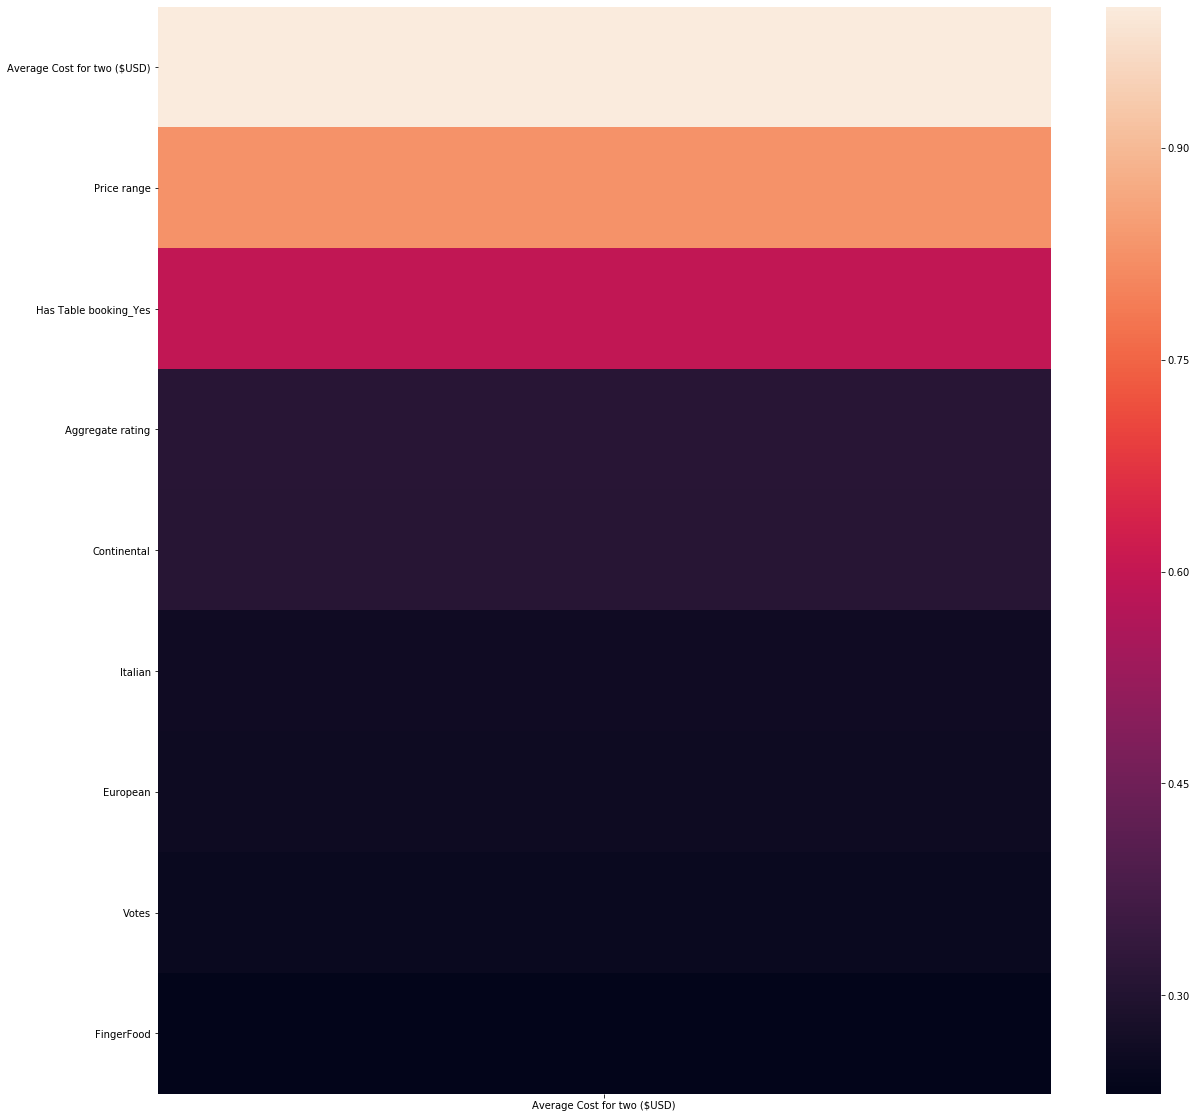

In [39]:
#check correlation with heatmap visualization
plt.figure(figsize=(20,20))
sns.heatmap(corr)
plt.show()

In [40]:
#create new dataframe based on criteria
dfln1=dfln[['Average Cost for two ($USD)', 'Price range', 'Has Table booking_Yes',
       'Aggregate rating', 'Continental', 'Italian', 'European', 'Votes',
       'FingerFood'  
       ]]
dfln1scale=dfln1.drop('Average Cost for two ($USD)',axis=1)
dfln1scale

,Price range,Has Table booking_Yes,Aggregate rating,Continental,Italian,European,Votes,FingerFood
0,3,0,3.9,0,0,0,140.0,0
1,2,0,3.5,0,0,0,71.0,0
2,2,0,3.6,0,0,0,94.0,0
3,2,0,4.0,0,0,0,87.0,0
4,3,0,4.2,0,0,0,177.0,0
...,...,...,...,...,...,...,...,...
6508,2,0,3.6,1,0,0,193.0,0
6509,2,0,3.7,0,0,0,85.0,0
6510,2,0,4.3,0,0,0,172.0,0
6511,4,0,3.8,1,0,0,74.0,0


In [41]:
#standard scaling with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dfln1scale)
dfln1scale = pd.DataFrame(scaler.transform(dfln1scale),columns=dfln1scale.columns)
dfln1scale['Average Cost for two ($USD)']=dfln1['Average Cost for two ($USD)']
dfln1

,Average Cost for two ($USD),Price range,Has Table booking_Yes,Aggregate rating,Continental,Italian,European,Votes,FingerFood
0,11.16,3,0,3.9,0,0,0,140.0,0
1,9.19,2,0,3.5,0,0,0,71.0,0
2,6.57,2,0,3.6,0,0,0,94.0,0
3,5.25,2,0,4.0,0,0,0,87.0,0
4,13.13,3,0,4.2,0,0,0,177.0,0
...,...,...,...,...,...,...,...,...,...
6508,7.88,2,0,3.6,1,0,0,193.0,0
6509,5.25,2,0,3.7,0,0,0,85.0,0
6510,7.88,2,0,4.3,0,0,0,172.0,0
6511,19.70,4,0,3.8,1,0,0,74.0,0


In [42]:
#set target and features
y = dfln1scale['Average Cost for two ($USD)']
X = dfln1scale.drop('Average Cost for two ($USD)', axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Price range,19.634090
Has Table booking_Yes,4.323159
Aggregate rating,1.022535
Continental,0.191115
Italian,-0.231451
European,4.094186
Votes,0.031978
FingerFood,3.486660


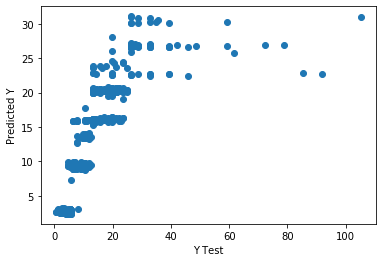

In [45]:
predictions = lm.predict(X_test) #predict test
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [46]:
score = r2_score(y_test,predictions)
score

0.6689829605242178

## Remove outliers to optimalization the prediction results

In [47]:
dfindia = df[(df['Country']=='India')]

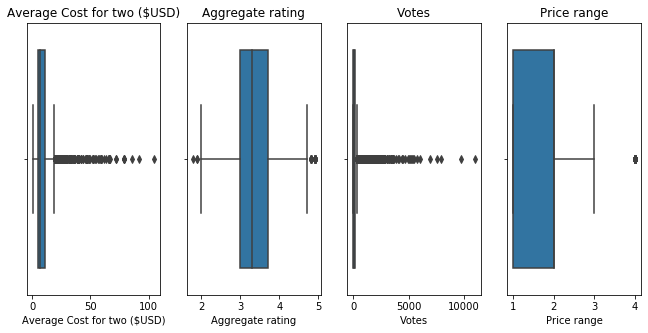

In [48]:
#check outlier data with boxplot
fig=plt.figure(figsize=(11,5))
ax = fig.add_subplot(1,4,1)
ax.set_title('Average Cost for two ($USD)')
sns.boxplot(dfindia['Average Cost for two ($USD)'])
ax = fig.add_subplot(1,4,2)
ax.set_title('Aggregate rating')
sns.boxplot(dfindia['Aggregate rating'])
ax = fig.add_subplot(1,4,3)
ax.set_title('Votes')
sns.boxplot(dfindia['Votes'])
ax = fig.add_subplot(1,4,4)
ax.set_title('Price range')
sns.boxplot(dfindia['Price range'])
plt.show()


In [49]:
def check_outlier(dataframe, col):
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)].index ,upper_limit,lower_limit
id_to_drop,upper_limit,lower_limit= check_outlier(dfindia,'Average Cost for two ($USD)')
dfindia.drop(id_to_drop,inplace=True)
dfindia.reset_index(drop=True,inplace=True)
id_to_drop,upper_limit,lower_limit= check_outlier(dfindia,'Votes')
dfindia.drop(id_to_drop,inplace=True)
dfindia.reset_index(drop=True,inplace=True)
id_to_drop,upper_limit,lower_limit= check_outlier(dfindia,'Aggregate rating')
dfindia.drop(id_to_drop,inplace=True)
dfindia.reset_index(drop=True,inplace=True)
id_to_drop,upper_limit,lower_limit= check_outlier(dfindia,'Price range')
dfindia.drop(id_to_drop,inplace=True)
dfindia.reset_index(drop=True,inplace=True)
#dataframe for linear regressions
dfln=dfindia[['Has Table booking','Has Online delivery','Switch to order menu','Votes','Price range','Average Cost for two ($USD)','Aggregate rating']]
dfln.reset_index(drop=True,inplace=True)

In [50]:
n=dfindia.copy()
n['Cuisines']=n['Cuisines'].str.replace(' ','')
joincuisine=','.join(map(str,n['Cuisines'].values))
def removeDuplicate(text):
    textsplit=text.split(",")
    z=[]
    for i in textsplit:
        check=False
        for b in z:
            if b==i:
                check = True
        if (check==False):
            z.append(i)
    return(z)
listcuisine=removeDuplicate(joincuisine)
for cuisine in listcuisine:
    dfln[cuisine] = n['Cuisines'].str.contains(str(cuisine))
    dfln[cuisine].replace({True:1,False:0},inplace=True)
dfln

,Has Table booking,Has Online delivery,Switch to order menu,Votes,Price range,Average Cost for two ($USD),Aggregate rating,NorthIndian,Mughlai,Rajasthani,Chinese,Gujarati,Continental,SouthIndian,Desserts,Cafe,Italian,Mexican,Pizza,FastFood,Asian,American,Armenian,StreetFood,Salad,HealthyFood,Beverages,Bakery,Mithai,Biryani,Juices,Maharashtrian,Hyderabadi,Tex-Mex,European,Seafood,Tea,Burger,Indian,Thai,Malaysian,Parsi,IceCream,RawMeats,FingerFood,Japanese,Lebanese,Burmese,Kashmiri,Sushi,Greek,Mediterranean,Lucknowi,Tibetan,Vietnamese,Korean,Awadhi,Bengali,Nepalese,Arabian,Oriya,Bihari,Kerala,Indonesian,Goan,Portuguese,Assamese,CharcoalGrill,African,Mangalorean,Andhra,Malwani,Turkish,Moroccan,Chettinad,Naga,Afghani,Deli,Sandwich,MiddleEastern,NorthEastern,ModernIndian,BBQ,Cajun
0,No,No,No,140.0,3,11.16,3.9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,No,No,No,71.0,2,9.19,3.5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,No,No,No,94.0,2,6.57,3.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,No,No,No,87.0,2,5.25,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,No,No,No,177.0,3,13.13,4.2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136,No,No,No,75.0,2,7.88,4.1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5137,No,No,No,169.0,2,5.91,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5138,No,No,No,193.0,2,7.88,3.6,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5139,No,No,No,85.0,2,5.25,3.7,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
#one hot encoding for data
dfln=pd.get_dummies(dfln)
dfln.reset_index(drop=True,inplace=True)
#check correlation
corr = dfln.corr()[['Average Cost for two ($USD)']].sort_values('Average Cost for two ($USD)', ascending=False)
corr=corr[corr['Average Cost for two ($USD)']>0.2]
corr

,Average Cost for two ($USD)
Average Cost for two ($USD),1.000000
Price range,0.877703
Has Table booking_Yes,0.546060
Votes,0.356589
Continental,0.306259
Italian,0.280653
NorthIndian,0.239046
Chinese,0.235405
Mughlai,0.212134
Has Online delivery_Yes,0.205086


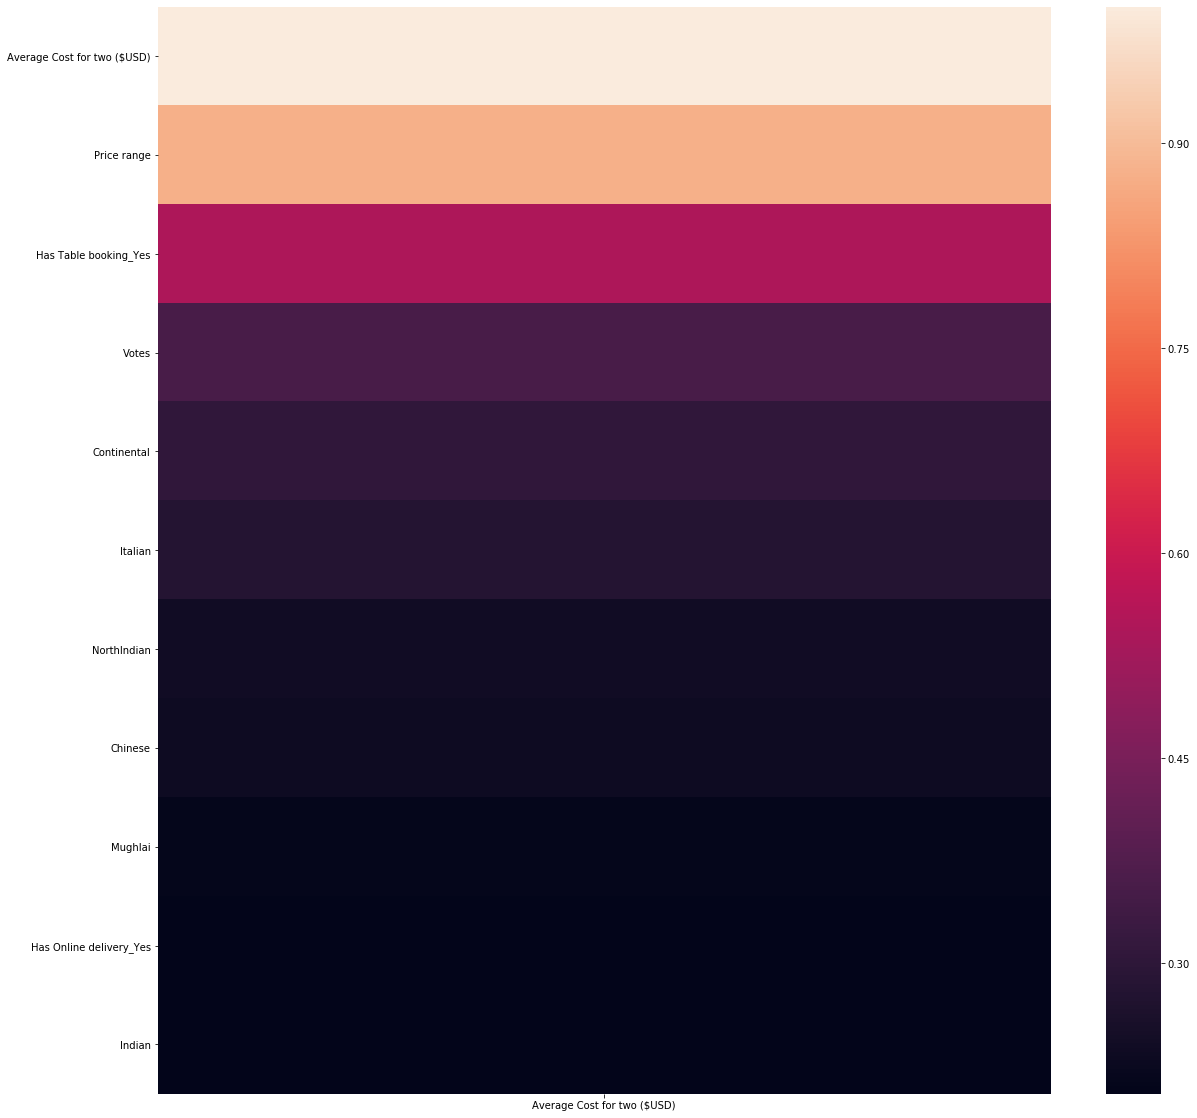

In [52]:
#check correlation with heatmap visualization
plt.figure(figsize=(20,20))
sns.heatmap(corr)
plt.show()

In [53]:
#create new dataframe based on criteria
dfln1=dfln[['Average Cost for two ($USD)', 'Price range','Aggregate rating', 'Votes','Has Table booking_Yes','Chinese','NorthIndian', 'Indian',
       'Continental', 'Italian','Mughlai'
       ]]
dfln1scale=dfln1.drop('Average Cost for two ($USD)',axis=1)
dfln1scale

,Price range,Aggregate rating,Votes,Has Table booking_Yes,Chinese,NorthIndian,Indian,Continental,Italian,Mughlai
0,3,3.9,140.0,0,0,1,1,0,0,1
1,2,3.5,71.0,0,0,1,1,0,0,1
2,2,3.6,94.0,0,0,1,1,0,0,0
3,2,4.0,87.0,0,0,0,0,0,0,0
4,3,4.2,177.0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5136,2,4.1,75.0,0,1,1,1,1,1,0
5137,2,4.0,169.0,0,0,0,0,0,0,0
5138,2,3.6,193.0,0,1,1,1,1,0,0
5139,2,3.7,85.0,0,1,1,1,0,0,0


In [54]:
from sklearn.preprocessing import MinMaxScaler
#standard scaling with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dfln1scale)
dfln1scale = pd.DataFrame(scaler.transform(dfln1scale),columns=dfln1scale.columns)
dfln1scale['Average Cost for two ($USD)']=dfln1['Average Cost for two ($USD)']
dfln1

,Average Cost for two ($USD),Price range,Aggregate rating,Votes,Has Table booking_Yes,Chinese,NorthIndian,Indian,Continental,Italian,Mughlai
0,11.16,3,3.9,140.0,0,0,1,1,0,0,1
1,9.19,2,3.5,71.0,0,0,1,1,0,0,1
2,6.57,2,3.6,94.0,0,0,1,1,0,0,0
3,5.25,2,4.0,87.0,0,0,0,0,0,0,0
4,13.13,3,4.2,177.0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5136,7.88,2,4.1,75.0,0,1,1,1,1,1,0
5137,5.91,2,4.0,169.0,0,0,0,0,0,0,0
5138,7.88,2,3.6,193.0,0,1,1,1,1,0,0
5139,5.25,2,3.7,85.0,0,1,1,1,0,0,0


In [55]:
dfln1scale

,Price range,Aggregate rating,Votes,Has Table booking_Yes,Chinese,NorthIndian,Indian,Continental,Italian,Mughlai,Average Cost for two ($USD)
0,1.0,0.791667,0.498168,0.0,0.0,1.0,1.0,0.0,0.0,1.0,11.16
1,0.5,0.625000,0.245421,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.19
2,0.5,0.666667,0.329670,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.57
3,0.5,0.833333,0.304029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.25
4,1.0,0.916667,0.633700,0.0,1.0,1.0,1.0,0.0,0.0,1.0,13.13
...,...,...,...,...,...,...,...,...,...,...,...
5136,0.5,0.875000,0.260073,0.0,1.0,1.0,1.0,1.0,1.0,0.0,7.88
5137,0.5,0.833333,0.604396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.91
5138,0.5,0.666667,0.692308,0.0,1.0,1.0,1.0,1.0,0.0,0.0,7.88
5139,0.5,0.708333,0.296703,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.25


In [56]:
#set target and features
y = dfln1scale['Average Cost for two ($USD)']
X = dfln1scale.drop('Average Cost for two ($USD)', axis=1)

In [57]:
X

,Price range,Aggregate rating,Votes,Has Table booking_Yes,Chinese,NorthIndian,Indian,Continental,Italian,Mughlai
0,1.0,0.791667,0.498168,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.5,0.625000,0.245421,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.5,0.666667,0.329670,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.5,0.833333,0.304029,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.916667,0.633700,0.0,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5136,0.5,0.875000,0.260073,0.0,1.0,1.0,1.0,1.0,1.0,0.0
5137,0.5,0.833333,0.604396,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5138,0.5,0.666667,0.692308,0.0,1.0,1.0,1.0,1.0,0.0,0.0
5139,0.5,0.708333,0.296703,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [58]:
#Train test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [59]:
#Check default modelling with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Price range,7.889142
Aggregate rating,-0.198445
Votes,0.788474
Has Table booking_Yes,2.435856
Chinese,0.296482
NorthIndian,0.255630
Indian,-0.184843
Continental,0.627506
Italian,0.534921
Mughlai,0.341055


In [61]:
predictions = lm.predict(X_test) #predict test

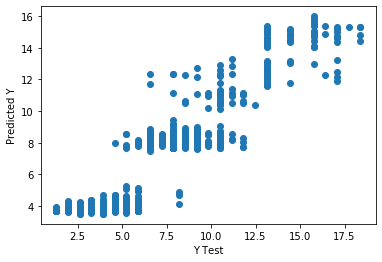

In [62]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [63]:
score = r2_score(y_test,predictions)
score

0.8285567159870071

## Use KFold for search best model based on default

In [64]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import KFold

In [65]:
def regression_model(n_cv):
    score = []
    model_name = ['Linear Regression','Lasso','Ridge','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor']
    models = [LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor]
    for item in models:
        rmse = []
        mae = []
        kf = KFold(n_splits=n_cv,shuffle=True)
        r2score=[]
        for train_index , test_index in kf.split(X,y):
            X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
            model = item()
            model.fit(X_train,y_train)
            prediction = model.predict(X_test)
            mae.append(round(mean_absolute_error(y_test,prediction),2))
            rmse.append(round(np.sqrt(mean_squared_error(y_test,prediction)),2))
            r2score.append(round(r2_score(y_test,prediction),2))
            
        temp = [
            sum(mae)/n_cv,
            sum(rmse)/n_cv,sum(r2score)/n_cv]
        score.append(temp)
    return pd.DataFrame(score,columns=['MAE','RMSE','R2_Score'],index=model_name)

In [68]:
regression_model(5)

,MAE,RMSE,R2_Score
Linear Regression,1.202,1.496,0.814
Lasso,2.668,3.456,0.000
Ridge,1.200,1.496,0.810
DecisionTreeRegressor,1.476,1.972,0.672
RandomForestRegressor,1.238,1.574,0.790
GradientBoostingRegressor,1.162,1.468,0.820


> The best model is Gradient Boosting Regresor so we use gridsearch cv in GradientBoosting

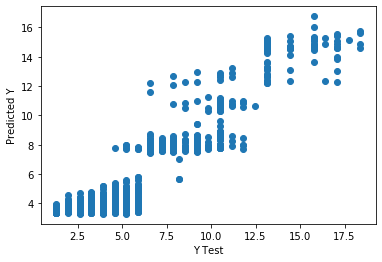

In [69]:
model = GradientBoostingRegressor(random_state=101)
model.fit(X,y)
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [70]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', r2_score(y_test,predictions))

MAE: 1.0931017040809186
MSE: 1.8157063947392136
RMSE: 1.3474815007038923
R2 Score: 0.8467847602476066


In [71]:
from sklearn.model_selection import GridSearchCV
gradient = GradientBoostingRegressor(random_state=101)

parameters = {
    'n_estimators' : [20,25,50,75,100],
    'learning_rate' : np.linspace(0.001,0.5,2),
    'subsample' : np.linspace(0.1,0.8,2),
    'min_samples_split' : [i for i in range(2,5)],
    'min_samples_leaf' : [i for i in range(2,5)],
    'max_depth' : [i for i in range(4,7)]
}
search = GridSearchCV(estimator=gradient,param_grid=parameters, cv=3,scoring='r2',n_jobs=-1)
search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [72]:
search.best_params_

{'learning_rate': 0.5,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 20,
 'subsample': 0.8}

In [73]:
model=GradientBoostingRegressor(random_state=101,learning_rate=0.5,max_depth=4,min_samples_leaf=2,min_samples_split=2,n_estimators=20,subsample=0.8)
model.fit(X,y)
predictions = model.predict(X_test)

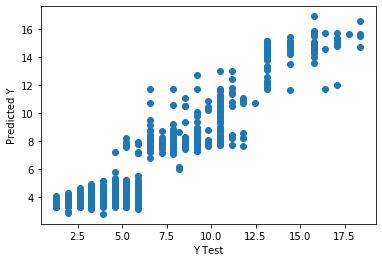

In [74]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [75]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', r2_score(y_test,predictions))

MAE: 1.0667213072812751
MSE: 1.6886021483918485
RMSE: 1.2994622535463847
R2 Score: 0.8575102319615816


In [76]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', r2_score(y_test,predictions))

MAE: 1.0667213072812751
MSE: 1.6886021483918485
RMSE: 1.2994622535463847
R2 Score: 0.8575102319615816


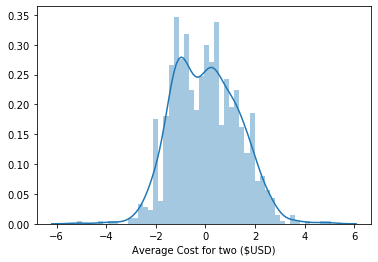

In [77]:
#Residual values
sns.distplot((y_test-predictions),bins=50)
plt.show()

## Feature Importance for algorithm

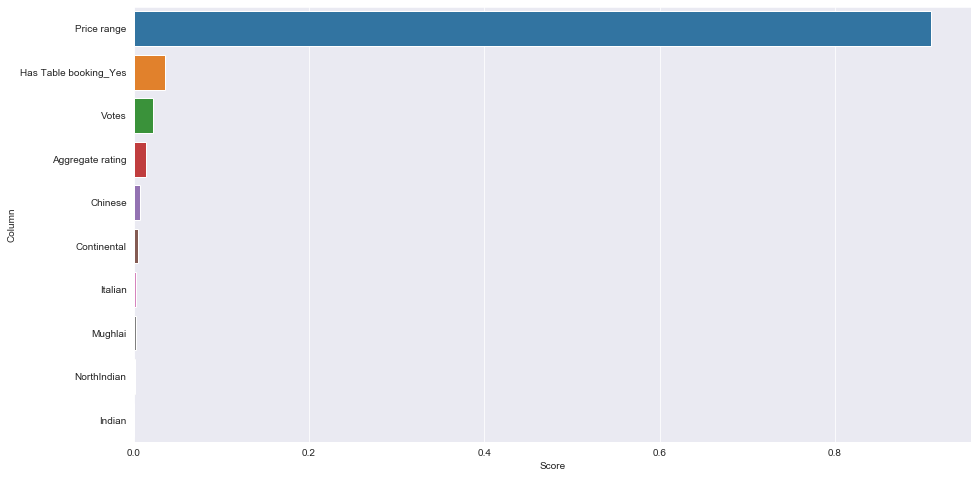

In [78]:
score = pd.DataFrame(model.feature_importances_, columns=['Score'])
score['Column'] = X.columns
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(data=score.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

# Export Model

In [79]:
cb_Cuisines

,Restaurant Name,Cuisines,City,Locality Verbose,Country,Longitude,Latitude,Average Cost for two ($USD),Aggregate rating,Votes,Location
0,Jahanpanah,"NorthIndian,Mughlai",Agra,"Agra Cantt, Agra",India,78.011544,27.161661,11.16,3.9,140.0,"AgraCantt,Agra,India"
1,Rangrezz Restaurant,"NorthIndian,Mughlai",Agra,"Agra Cantt, Agra",India,78.032615,27.166690,9.19,3.5,71.0,"AgraCantt,Agra,India"
2,Time2Eat - Mama Chicken,NorthIndian,Agra,"Agra Cantt, Agra",India,78.011608,27.160832,6.57,3.6,94.0,"AgraCantt,Agra,India"
3,Chokho Jeeman Marwari Jain Bhojanalya,Rajasthani,Agra,"Civil Lines, Agra",India,77.998092,27.195928,5.25,4.0,87.0,"CivilLines,Agra,India"
4,Pinch Of Spice,"NorthIndian,Chinese,Mughlai",Agra,"Civil Lines, Agra",India,78.007553,27.201725,13.13,4.2,177.0,"CivilLines,Agra,India"
...,...,...,...,...,...,...,...,...,...,...,...
6508,D Cabana,"Continental,Seafood,Chinese,NorthIndian,Biryani",Vizag,"Sagar Nagar, Vizag",India,83.361377,17.764287,7.88,3.6,193.0,"SagarNagar,Vizag,India"
6509,Kaloreez,"Cafe,NorthIndian,Chinese",Vizag,"Siripuram, Vizag",India,83.323489,17.729957,5.25,3.7,85.0,"Siripuram,Vizag,India"
6510,Plot 17,"Burger,Pizza,Biryani",Vizag,"Siripuram, Vizag",India,83.315281,17.719539,7.88,4.3,172.0,"Siripuram,Vizag,India"
6511,Vista - The Park,"American,NorthIndian,Thai,Continental",Vizag,"The Park, Lawsons Bay, Vizag",India,83.336840,17.721182,19.70,3.8,74.0,"ThePark,LawsonsBay,Vizag,India"


In [80]:
model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=101, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
import pickle
filename = 'finalized_model_zomato.sav'
pickle.dump(model, open(filename, 'wb'))
filename = 'scaler_zomato.sav'
pickle.dump(scaler, open(filename , 'wb'))

In [82]:
cb_Cuisines.to_csv('ZomatoDataforRecommend.csv')